### Basic Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from windrose import WindroseAxes

In [2]:
RAW_DATA = "../data/sierraleone-bumbuna.csv"
CLEANED_DATA = "../data/sierraleone-bumbuna_cleaned.csv"
data = pd.read_csv(RAW_DATA)
data.shape

(525600, 19)

## Summary Statistics & Missing-Value Report

In [3]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [4]:
missing_count= data.isna().sum()
missing_count

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
missing_percent = (missing_count/len(data))*100
missing_data = missing_percent[missing_percent>5]
print(f"Columns with missing Value > 5%: {missing_data}")

Columns with missing Value > 5%: Comments    100.0
dtype: float64


## Outlier Detection & Basic Cleaning

In [6]:
clean_data = data.drop(['Comments'], axis=1)
clean_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

In [7]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_score = np.abs(zscore(clean_data[key_columns]))
outlier_flag = (z_score >3).any(axis=1)
clean_data['Outlier_flag'] = outlier_flag
outliers = clean_data[clean_data['Outlier_flag']]
outliers.head

<bound method NDFrame.head of                Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653     2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654     2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655     2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656     2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657     2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
522184  2022-10-27 15:05  167.2   -0.5  165.1  167.6  160.9  30.4  68.3  5.3   
522185  2022-10-27 15:06  163.4   -0.6  161.0  165.7  159.2  30.2  67.7  7.1   
522194  2022-10-27 15:15  183.5    0.3  181.6  173.7  168.7  29.3  70.2  4.9   
523792  2022-10-28 17:53   31.3   -0.5   30.2   34.3   32.3  28.4  79.5  5.0   
523794  2022-10-28 17:55   22.8   -0.8   21.4   26.5   25.0  27.9  80.4  5.0   

        W

### Cleaned Data Saving

In [8]:
clean_data.to_csv(CLEANED_DATA, index=False)
print(f'Data saved to {CLEANED_DATA}')

Data saved to ../data/sierraleone-bumbuna_cleaned.csv


### Time Series Analysis

c:\Users\PC\Documents\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


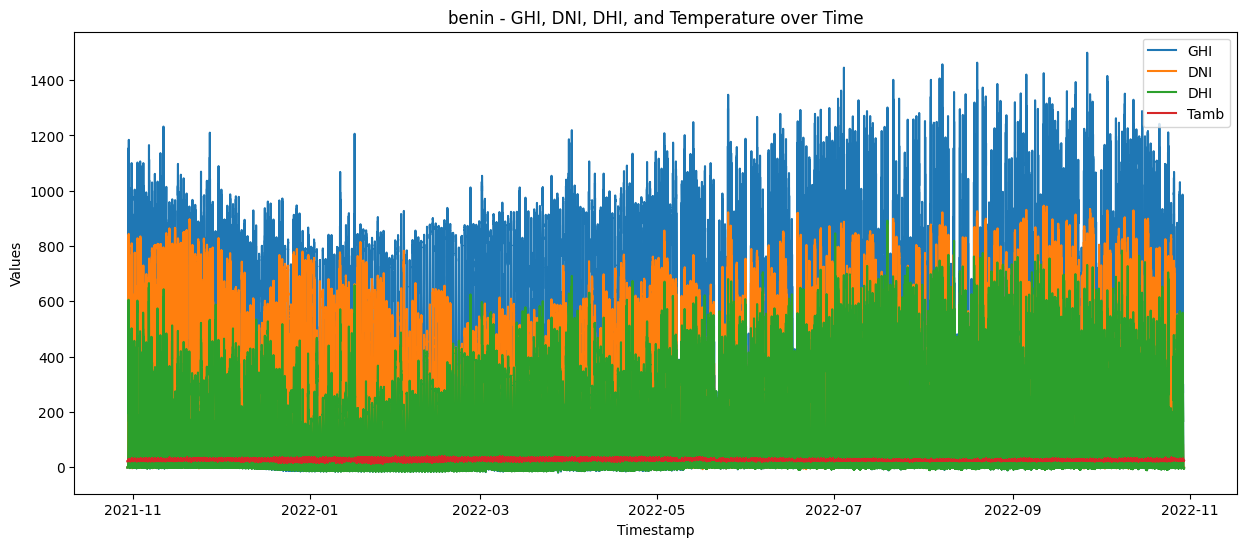

In [9]:
clean_data['Timestamp'] = pd.to_datetime(clean_data['Timestamp'])
clean_data = clean_data.sort_values(['Timestamp'])
plt.figure(figsize=(15, 6))
sns.lineplot(x='Timestamp', y='GHI', data=clean_data, label='GHI')
sns.lineplot(x='Timestamp', y='DNI', data=clean_data, label='DNI')
sns.lineplot(x='Timestamp', y='DHI', data=clean_data, label='DHI')
sns.lineplot(x='Timestamp', y='Tamb', data=clean_data, label='Tamb')
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.title("benin - GHI, DNI, DHI, and Temperature over Time")
plt.show()


### Observation Patterns by month

In [10]:
clean_data['Month'] = clean_data['Timestamp'].dt.month
monthly_ave = clean_data.groupby(['Month'])[key_columns].mean()
monthly_ave

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
Month,,,,,,,
1,196.847731,168.745343,78.310069,228.188481,213.874238,1.089960,1.591871
2,219.716979,147.174861,107.792954,241.637899,231.474640,1.201409,1.747894
3,231.273602,129.395663,126.952959,240.931172,224.868873,1.337233,1.930327
4,236.642894,144.402826,117.430572,233.471414,224.709088,1.733991,2.424035
5,203.376830,98.968831,123.982350,188.229315,182.365466,1.281322,1.855432
6,200.210752,98.433542,121.722294,181.543352,172.759148,0.993236,1.522667
7,169.493488,54.277652,127.461676,157.837845,152.314527,1.098136,1.658378
8,154.948546,40.761927,122.433116,150.776828,146.646884,1.119581,1.733248
9,193.052606,79.690856,130.299032,189.926366,185.404900,0.995880,1.513347


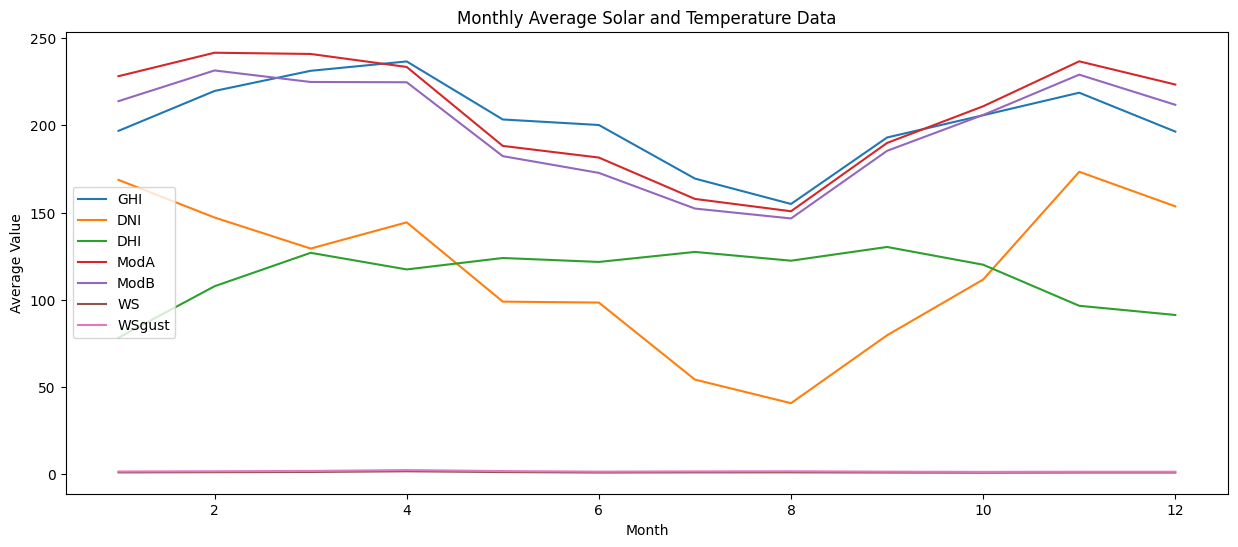

In [11]:
monthly_ave.plot(kind='line', figsize=(15, 6))
plt.title("Monthly Average Solar and Temperature Data")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.show()

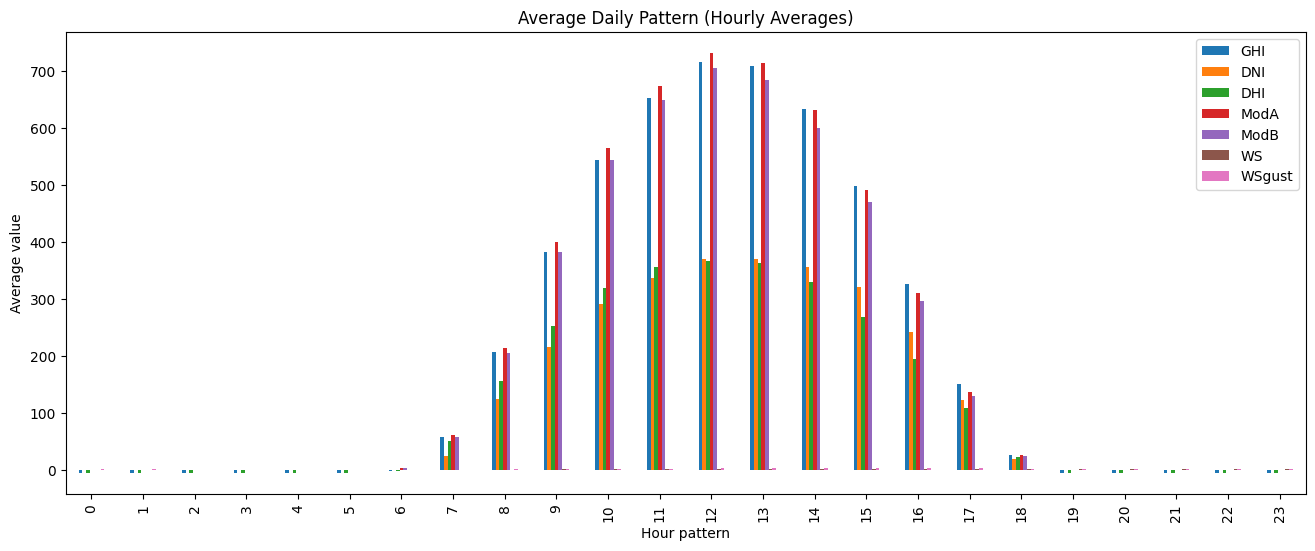

In [12]:
clean_data['Hour'] = clean_data['Timestamp'].dt.hour
hourly_ave = clean_data.groupby(['Hour'])[key_columns].mean()
hourly_ave.plot(kind='bar', figsize=(16, 6))
plt.title("Average Daily Pattern (Hourly Averages)")
plt.xlabel("Hour pattern")
plt.ylabel("Average value")
plt.show()

### Cleaning Impact

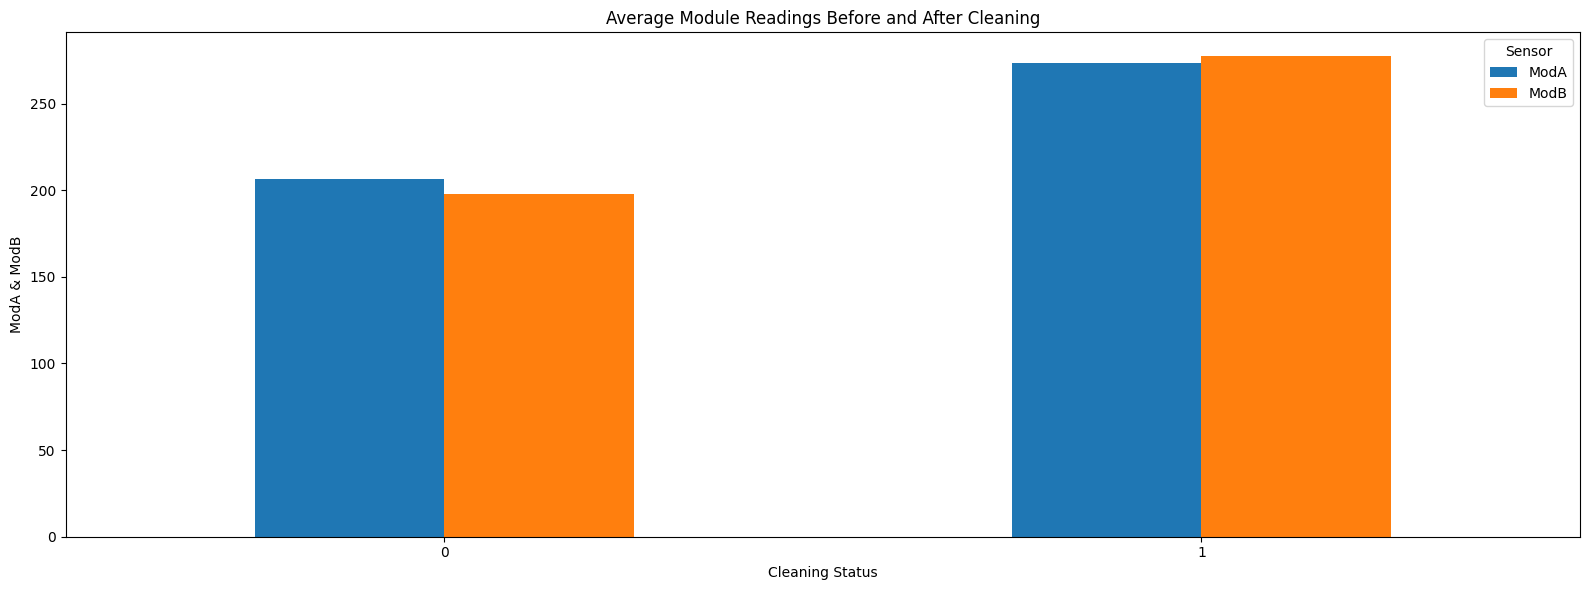

In [13]:
cleaninf_flag = clean_data.groupby(['Cleaning'])[['ModA', 'ModB']].mean()
cleaninf_flag.plot(kind='bar', figsize=(16, 6))
plt.title("Average Module Readings Before and After Cleaning")
plt.xlabel("Cleaning Status")
plt.ylabel("ModA & ModB")
plt.legend(title="Sensor")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Correlation & relationship Analysis

In [14]:
interest_colu = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_of_interest = clean_data[interest_colu].corr()
mask = np.zeros_like(corr_of_interest)
upper_tri = np.triu_indices_from(mask)
mask[upper_tri] = True

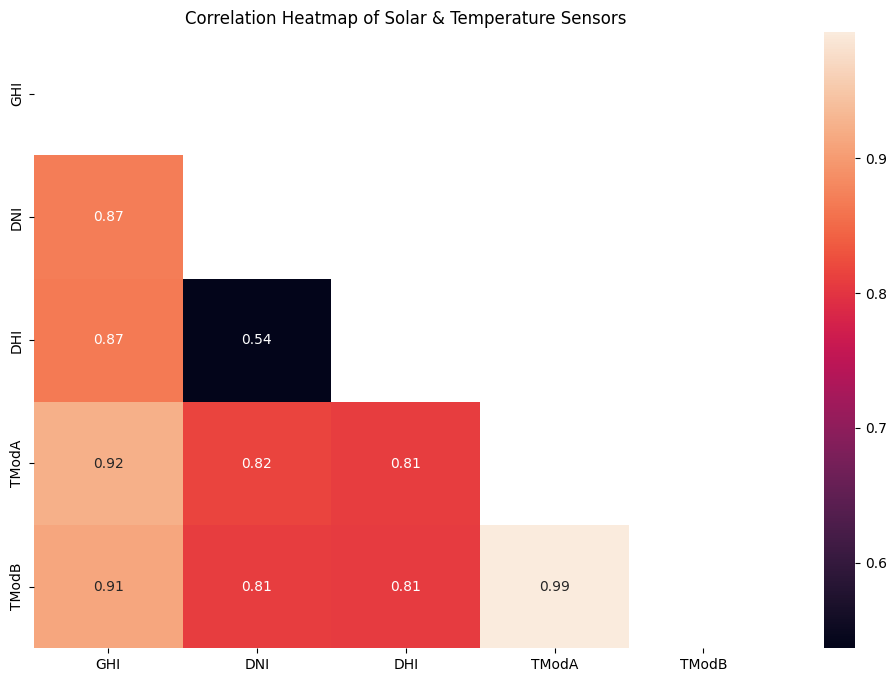

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_of_interest, mask=mask, annot=True)
plt.title("Correlation Heatmap of Solar & Temperature Sensors")
plt.show()

### Scatter Plot
#### wind vs. GHI

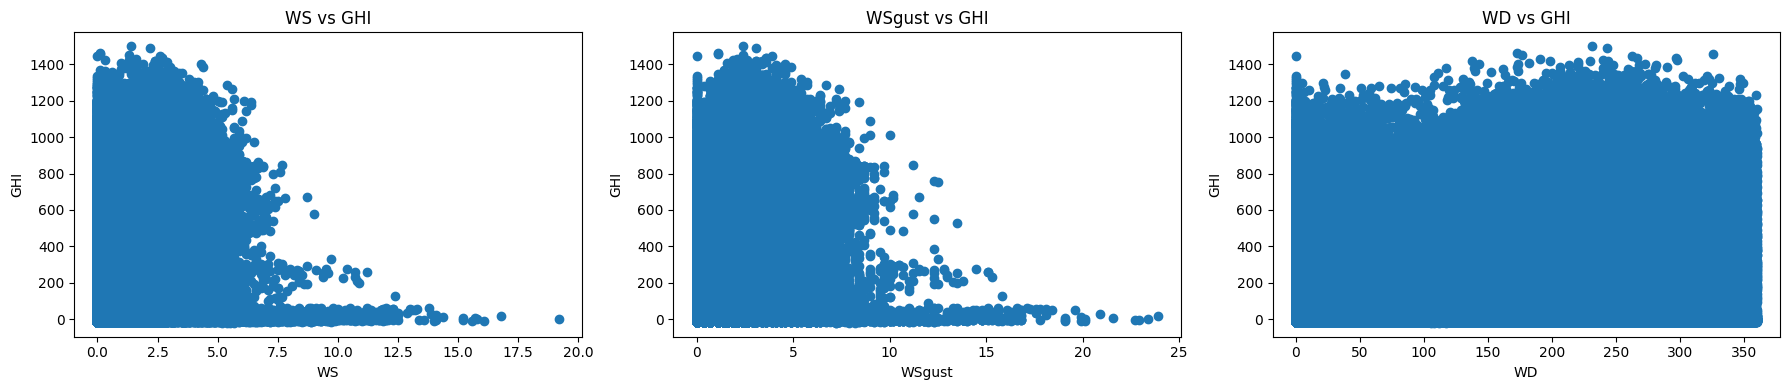

In [16]:
plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
plt.scatter(clean_data['WS'], clean_data['GHI'])
plt.title("WS vs GHI")
plt.xlabel('WS')
plt.ylabel('GHI')

plt.subplot(1,3,2)
plt.scatter(clean_data['WSgust'], clean_data['GHI'])
plt.title("WSgust vs GHI")
plt.xlabel('WSgust')
plt.ylabel('GHI')

plt.subplot(1,3,3)
plt.scatter(clean_data['WD'], clean_data['GHI'])
plt.title("WD vs GHI")
plt.xlabel('WD')
plt.ylabel('GHI')
plt.tight_layout()
plt.show()

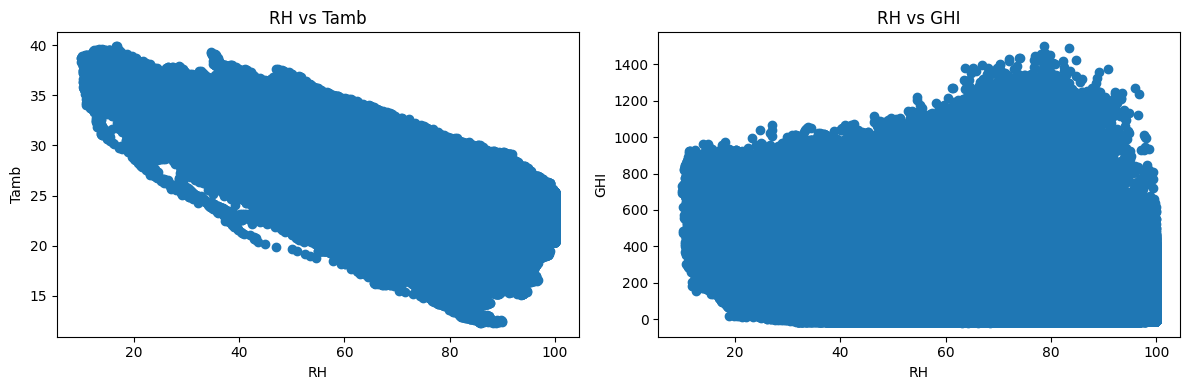

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(clean_data['RH'], clean_data['Tamb'])
plt.title("RH vs Tamb")
plt.xlabel('RH')
plt.ylabel('Tamb')

plt.subplot(1,2,2)
plt.scatter(clean_data['RH'], clean_data['GHI'])
plt.title("RH vs GHI")
plt.xlabel('RH')
plt.ylabel('GHI')
plt.tight_layout()
plt.show()

### Wind & Distrbution Analysis

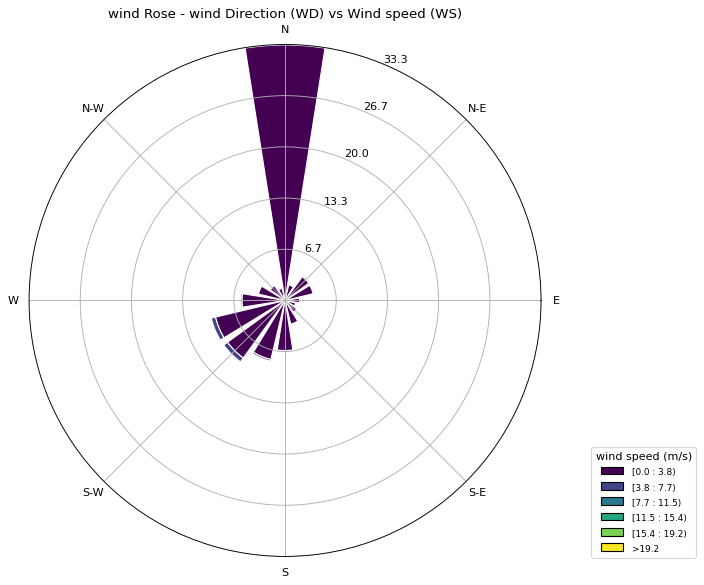

In [18]:
ax = WindroseAxes.from_ax()
ax.bar(clean_data['WD'], clean_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='wind speed (m/s)', bbox_to_anchor=(1.1,0))
plt.title("wind Rose - wind Direction (WD) vs Wind speed (WS)")
plt.show()

### Distribution Analysis (Histograms)

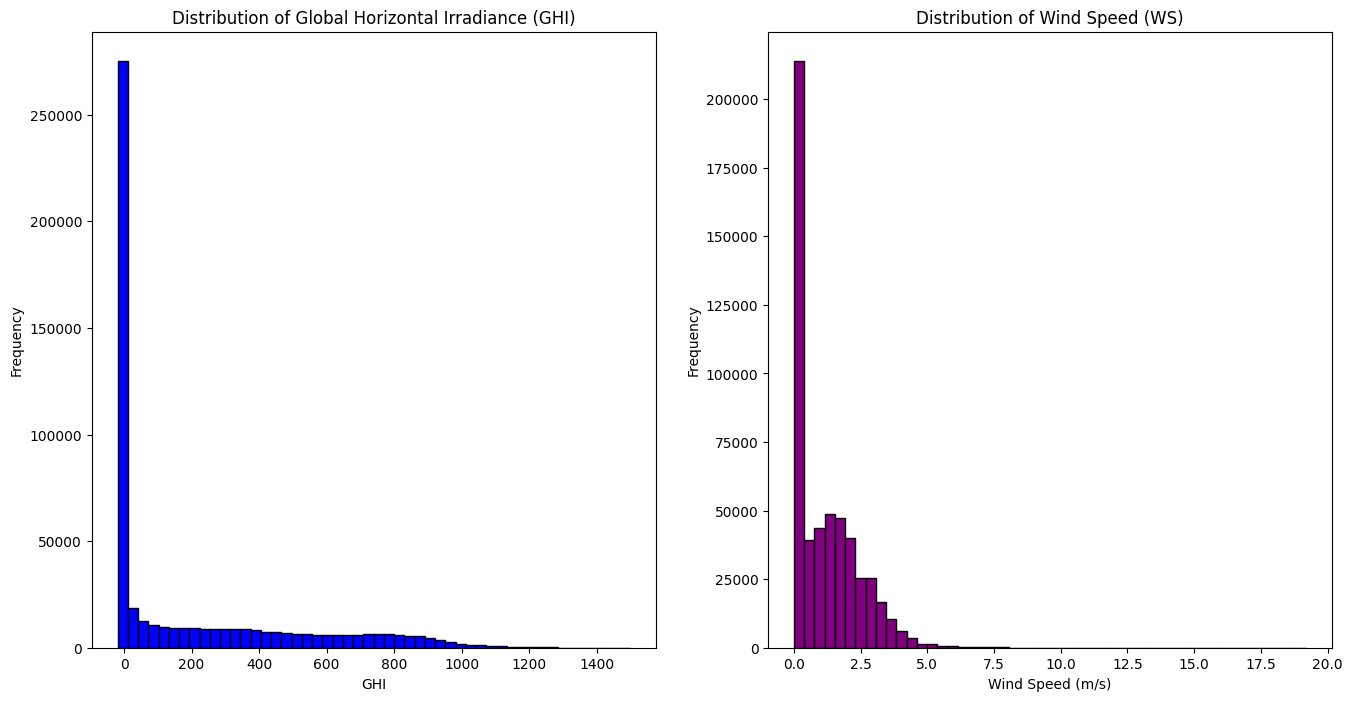

In [19]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.hist(clean_data['GHI'], bins=50, color='blue', ec='black')
plt.title("Distribution of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.hist(clean_data['WS'], bins=50, color='purple', ec='black')
plt.title("Distribution of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

### Temperature Analysis

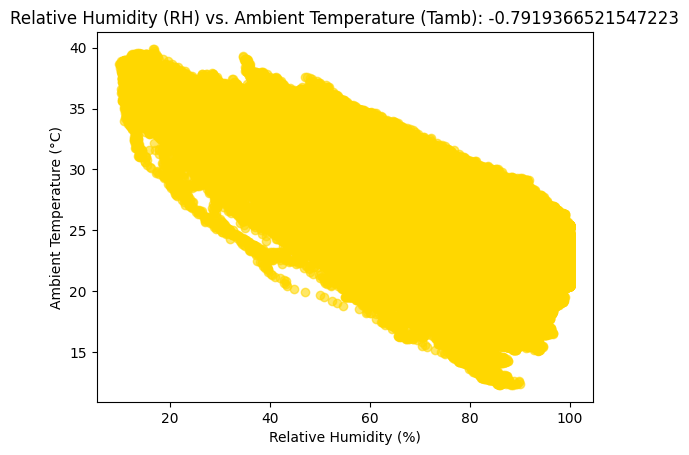

In [20]:
corr_RH_temb = clean_data['RH'].corr(clean_data['Tamb'])
plt.scatter(clean_data['RH'], clean_data['Tamb'], alpha=0.6, c='gold')
plt.title(f"Relative Humidity (RH) vs. Ambient Temperature (Tamb): {corr_RH_temb}")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.show()

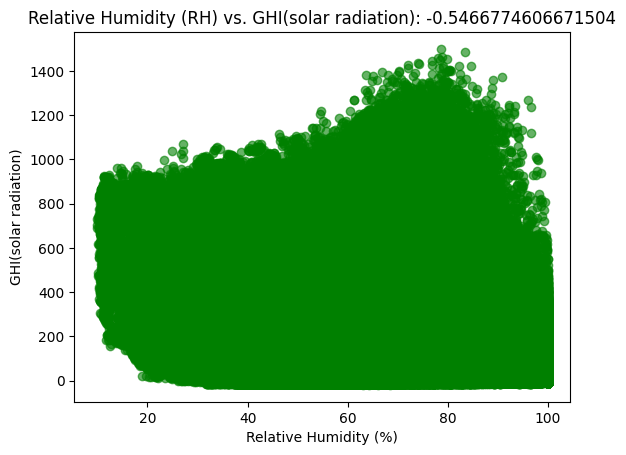

In [21]:
corr_RH_GHI = clean_data['RH'].corr(clean_data['GHI'])
plt.scatter(clean_data['RH'], clean_data['GHI'], alpha=0.6, c='green')
plt.title(f"Relative Humidity (RH) vs. GHI(solar radiation): {corr_RH_GHI}")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI(solar radiation)")
plt.show()

### Bubble chart

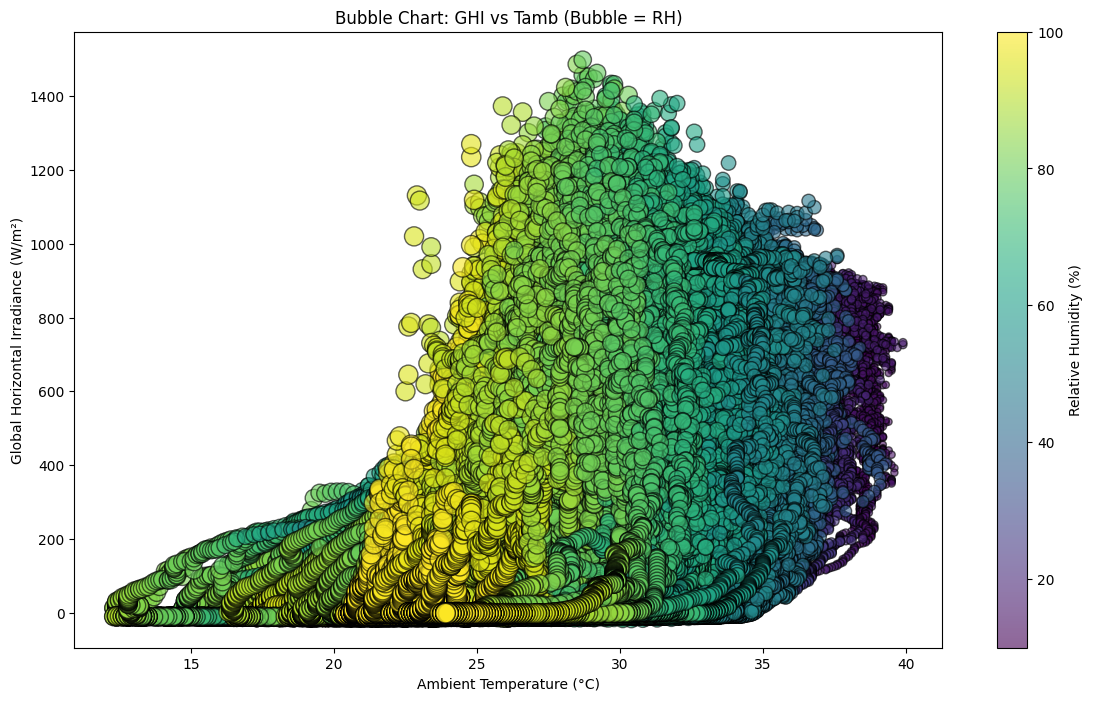

In [22]:
plt.figure(figsize=(14, 8))
plt.scatter(clean_data['Tamb'],clean_data['GHI'], s=clean_data['RH']*2, alpha=0.6, edgecolors='black', c=clean_data['RH'])
plt.title("Bubble Chart: GHI vs Tamb (Bubble = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
cbar = plt.colorbar()
cbar.set_label("Relative Humidity (%)")

plt.show()